<a href="https://colab.research.google.com/github/ShauryaDusht/machine-learning-basics/blob/main/LAB6_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **L1 and L2 Regularization**

**`Aim`**
```
1. What is overfitting in machine learning? How does Regularization can
help to avoid it. Differentiate between L1 and L2 regularization.
2. What is the role of hyperparameter λ (lambda) in regularization.


Apply regularization on Simple Dataset and  Boston Housing Dataset and observe
the results in terms of MSE for different regularizations and different choice
of λ (lambda).  Make suitable tables and graphs for better understanding.
```

```
Why Overfitting ?
- Overfitting occurs when a model learns the details and noise in the training
data to the extent that it negatively impacts the performance of the model on
new data (testing data). In other words, the model becomes too complex and fits
the training data too well, including the random fluctuations or outliers,
which reduces its ability to generalize to unseen data.
```

```
Differenciate between L1 and L2 regularization.

L1 regularization, also known as Lasso regularization, adds a penalty term to the
loss function that is proportional to the absolute value of the model's weights.

L2 regularization, also known as Ridge regularization, adds a penalty term to the
loss function that is proportional to the square of the model's weights.
```

```
Role of hyperparameter λ (lambda) in regularization.

λ (lambda) is a hyperparameter that controls the strength of regularization in
machine learning models.
```

## Importing Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# importing california housing dataset from sklearn
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.shape

(20640, 9)

In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


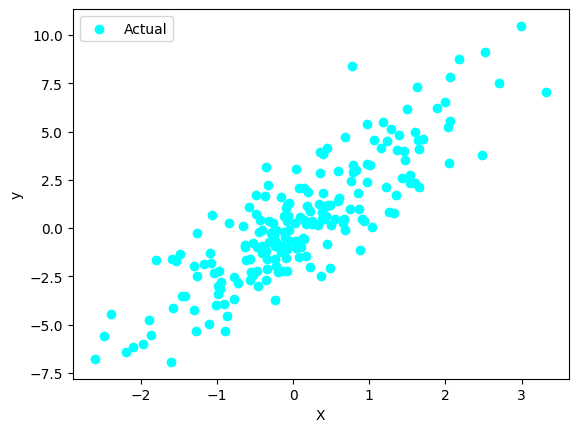

In [ ]:
# X = df.drop('target', axis=1)
# y = df['target']

n_samples, n_features = 200, 5
X = np.random.randn(n_samples, n_features)
coeff_true = np.array([2.5, -1.0, 0.5, 1.2, -0.3])
y = X @ coeff_true + np.random.randn(n_samples) * 0.5

# plot X and y
plt.scatter(X[:, 0], y, color='cyan', label='Actual')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## **Ridge Regression**

### Using built-in function

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X, y)

Ridge(alpha=1)

In [ ]:
# score of model
ridge_reg.score(X, y)

0.9757265324241505

### Without using built-in function

In [ ]:
%%time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

alpha = 1.0

n_samples, n_features = X_train.shape
I = np.identity(n_features)
I[0, 0] = 0

# solve(a,b)  ==>  aX = b  ==>  X = inv(a) * b
coeff = np.linalg.solve(np.dot(X_train.T, X_train) + alpha * I, np.dot(X_train.T, y_train))
y_pred = np.dot(X_test, coeff)

# using @ for dot product of matrices
# coeff = np.linalg.solve(X_train.T @ X_train + alpha * I, X_train.T @ y_train)
# y_pred = X_test @ coeff

mse = mean_squared_error(y_test, y_pred)

print(f"Coefficients: {coeff}")
print(f"Mean Squared Error: {mse}")

Coefficients: [ 0.0167876   2.45851435 -1.00290212  0.48795752  1.15199702 -0.23563729]
Mean Squared Error: 0.26188978745099745
CPU times: user 4.11 ms, sys: 0 ns, total: 4.11 ms
Wall time: 10.2 ms


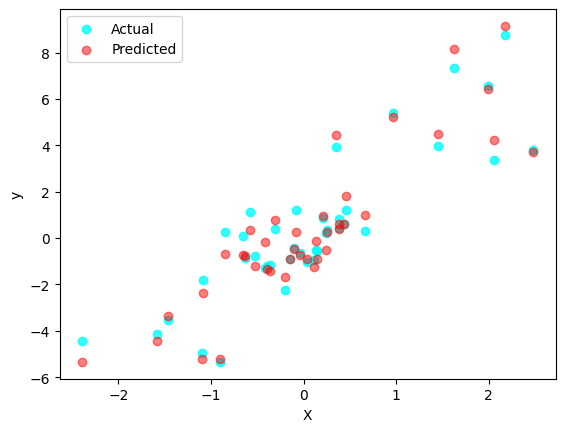

In [ ]:
# plot the results with actual data
plt.scatter(X_test[:, 1], y_test, color='cyan', label='Actual', alpha=0.8)
plt.scatter(X_test[:, 1], y_pred, color='red', label='Predicted', alpha=0.5)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Lasso Regression

### Using built-in function

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X, y)

Lasso(alpha=1)

In [ ]:
# score
lasso_reg.score(X, y)

0.6741358086316295

### Without using built-in function

In [ ]:
%%time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

alpha = 1.0

n_samples, n_features = X_train.shape

def soft_threshold(rho, lambda_):
  if rho < -lambda_:
    return rho + lambda_
  elif rho > lambda_:
    return rho - lambda_
  else:
    return 0

max_iter = 1000
coeff = np.zeros(n_features)
for iteration in range(max_iter):
    for j in range(n_features):
        rho = np.dot(X_train[:, j], y_train - np.dot(X_train, coeff) + coeff[j] * X_train[:, j])
        coeff[j] = soft_threshold(rho, alpha) / np.sum(X_train[:, j]**2)


y_pred = np.dot(X_test, coeff)

mse = mean_squared_error(y_test, y_pred)

print(f"Coefficients: {coeff}")
print(f"Mean Squared Error: {mse}")

Coefficients: [ 0.01036493  2.46688749 -1.00242577  0.48597343  1.15218831 -0.2308957 ]
Mean Squared Error: 0.2660109403031841
CPU times: user 159 ms, sys: 1.82 ms, total: 161 ms
Wall time: 231 ms


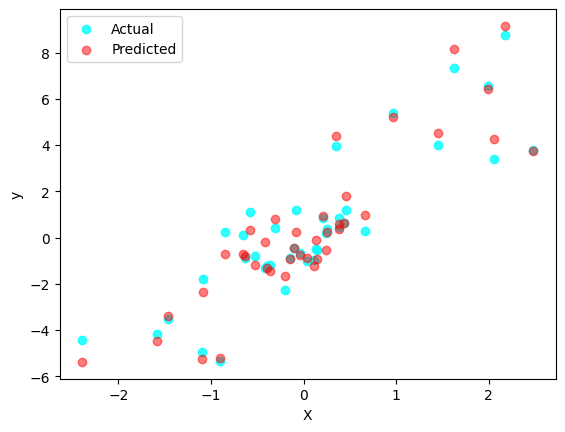

In [ ]:
# plotting results
plt.scatter(X_test[:, 1], y_test, color='cyan', label='Actual', alpha=0.8)
plt.scatter(X_test[:, 1], y_pred, color='red', label='Predicted', alpha=0.5)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Elastic Net

### Using built-in function

In [ ]:
from sklearn.linear_model import ElasticNet

X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

alpha = 1.0
l1_ratio = 0.1  # Mixing parameter (0 for Ridge, 1 for Lasso)


elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
elastic_net.fit(X_train, y_train)

y_pred = elastic_net.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"Coefficients: {elastic_net.coef_}")
print(f"Intercept: {elastic_net.intercept_}")
print(f"Mean Squared Error: {mse}")

Coefficients: [ 0.          0.          1.36815888 -0.46284934  0.18669819  0.59494492
 -0.05346562]
Intercept: 0.18173318024860874
Mean Squared Error: 2.0147991590085232


In [ ]:
# score
elastic_net.score(X_train, y_train)

0.7621698058619819

### Without using built-in function

In [ ]:
%%time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

alpha = 1.0
l1_ratio = 0.5

n_samples, n_features = X_train.shape
I = np.identity(n_features)
I[0, 0] = 0

coeff = np.zeros(n_features, dtype=np.float64)
i = 1000 # no of iterations
tol = 1e-6 # tolerance

for _ in range(i):
    coeff_old = coeff.copy()
    for j in range(n_features):
        rho = np.dot(X_train[:, j], (y_train - X_train @ coeff + coeff[j] * X_train[:, j]))
        z_j = np.sum(X_train[:, j] ** 2) + alpha * (1 - l1_ratio)
        coeff[j] = soft_threshold(rho, alpha * l1_ratio) / z_j

    if np.linalg.norm(coeff - coeff_old, ord=2) < tol:
        break

y_pred = np.dot(X_test, coeff)
mse = mean_squared_error(y_test, y_pred)

print(f"Coefficients: {coeff}")
print(f"Mean Squared Error: {mse}")

Coefficients: [ 0.01353221  2.46269352 -1.00266254  0.48697274  1.15209541 -0.23328039]
Mean Squared Error: 0.26391424335510577
CPU times: user 4.79 ms, sys: 13 µs, total: 4.8 ms
Wall time: 4.76 ms


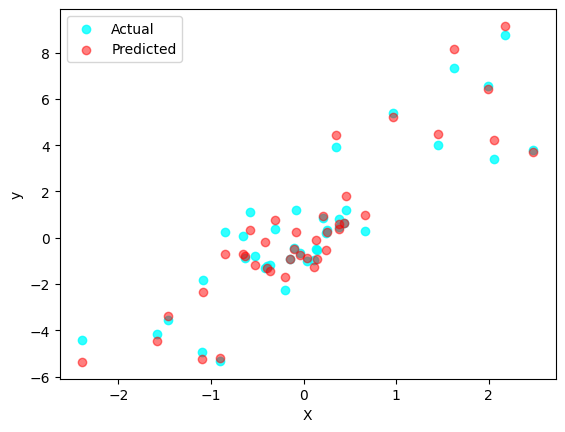

In [ ]:
# Plot results
plt.scatter(X_test[:, 1], y_test, color='cyan', label='Actual', alpha=0.8)
plt.scatter(X_test[:, 1], y_pred, color='red', label='Predicted', alpha=0.5)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()